In [1]:
import pandas as pd
import numpy as np

In [2]:

temperature_data = pd.read_csv('G:/fresh_start/main_thesis/data/saved_data/initial_all_data.csv')

In [3]:
print(temperature_data)

        Unnamed: 0 Geo_region  Station        Date      Max T      Min T  \
0                0   Mountain     1016  1990-01-01   9.578267  16.865993   
1                1   Mountain     1016  1990-01-02  10.074733  12.336708   
2                2   Mountain     1016  1990-01-03   8.822569  25.611077   
3                3   Mountain     1016  1990-01-04  12.803830   6.503694   
4                4   Mountain     1016  1990-01-05  10.202334  12.335740   
...            ...        ...      ...         ...        ...        ...   
216931      216931       Hill     1419  2022-12-27  21.000000   6.000000   
216932      216932       Hill     1419  2022-12-28  19.500000   5.500000   
216933      216933       Hill     1419  2022-12-29  18.500000   6.500000   
216934      216934       Hill     1419  2022-12-30  20.000000   7.500000   
216935      216935       Hill     1419  2022-12-31  20.000000   8.500000   

            Avg T  
0       13.222130  
1       11.205721  
2       17.216823  
3      

### For annual

In [4]:
for_annual_etccdi_data = temperature_data.copy()

In [5]:
# Convert the 'Date' column to datetime
for_annual_etccdi_data['Date'] = pd.to_datetime(for_annual_etccdi_data['Date'])
for_annual_etccdi_data['Year'] = for_annual_etccdi_data['Date'].dt.year

In [6]:

# Convert the 'Date' column to datetime
for_annual_etccdi_data['Date'] = pd.to_datetime(for_annual_etccdi_data['Date'])

# Define the index columns
year_index_columns = ["Geo_region", "Year", "TNn", "TNx", "TXn", "TXx", "TN10p", "TN90p", "TX10p", "TX90p"]

# Initialize an empty list to store DataFrames for each 'Geo_region'
year_result_dfs = []


# Loop through each 'Geo_region'
for geo_region, geo_region_data in for_annual_etccdi_data.groupby('Geo_region'):
    # Loop through each year 
        for year in for_annual_etccdi_data['Year'].unique():
            # Filter data for the specific year and month
            yearly_data = geo_region_data.loc[geo_region_data['Date'].dt.year == year]

            # Calculate the indices
            TNn = np.min(yearly_data['Min T'])
            TNx = np.max(yearly_data['Min T'])
            TXn = np.min(yearly_data['Max T'])
            TXx = np.max(yearly_data['Max T'])
            
            TN10p = np.mean(yearly_data['Min T'] < np.percentile(yearly_data['Min T'], 10))
            TN90p = np.mean(yearly_data['Min T'] > np.percentile(yearly_data['Min T'], 90))
            TX10p = np.mean(yearly_data['Max T'] < np.percentile(yearly_data['Max T'], 10))
            TX90p = np.mean(yearly_data['Max T'] > np.percentile(yearly_data['Max T'], 90))

            # Create a DataFrame to store the calculated values
            data_dict = {
                "Geo_region": geo_region,
                
                "Year": year,
                
                "TNn": TNn,
                "TNx": TNx,
                "TXn": TXn,
                "TXx": TXx, 
                
                "TN10p": TN10p,
                "TN90p": TN90p,
                "TX10p": TX10p,
                "TX90p": TX90p
            }
            yearly_result_df = pd.DataFrame([data_dict])

            # Append the data to the list of DataFrames
            year_result_dfs.append(yearly_result_df)

# Concatenate the DataFrames for all 'Geo_region' into a single result DataFrame
yearly_result_df = pd.concat(year_result_dfs, ignore_index=True)


In [7]:
print(yearly_result_df)

   Geo_region  Year       TNn        TNx        TXn        TXx     TN10p  \
0        Hill  1990 -8.939842  26.557076   3.267721  40.441107  0.096986   
1        Hill  1991 -2.081612  30.750162   5.911761  43.243860  0.100000   
2        Hill  1992 -0.656667  25.920450   3.738144  41.155172  0.100000   
3        Hill  1993 -0.300000  28.130968   7.371490  40.073066  0.098356   
4        Hill  1994 -2.000000  28.519886   0.934086  43.632591  0.100000   
..        ...   ...       ...        ...        ...        ...       ...   
94      Terai  2018  5.400000  27.000000  20.120453  40.600000  0.101370   
95      Terai  2019  4.400000  28.000000  18.258975  38.900000  0.101370   
96      Terai  2020  3.700000  27.600000  19.825624  37.400000  0.101093   
97      Terai  2021  6.400000  27.700000   7.908412  37.600000  0.098630   
98      Terai  2022  6.700000  27.900000  16.399842  38.700000  0.101370   

       TN90p     TX10p     TX90p  
0   0.093425  0.100000  0.099178  
1   0.100000  0.1

yearly_result_df.to_csv('G:/fresh_start/main_thesis/data/work_data/etccdi_annual_results_dfs.csv')

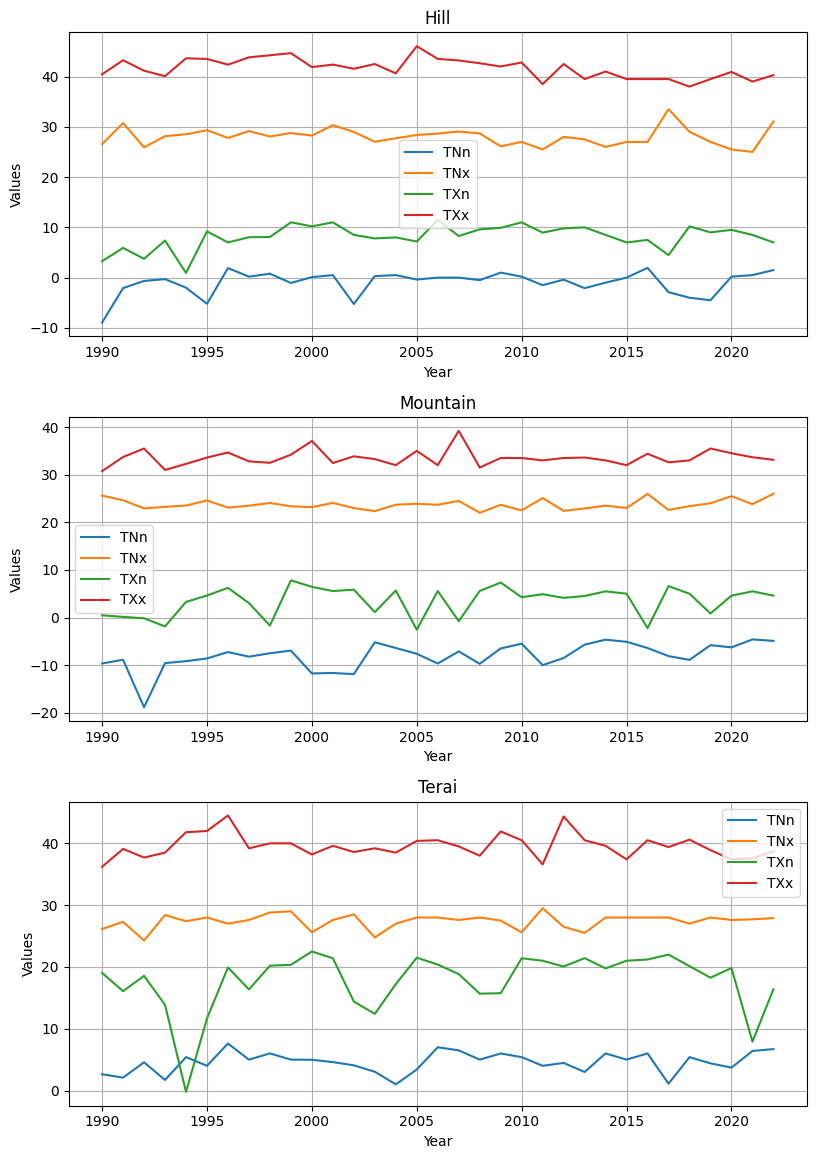

In [8]:
import matplotlib.pyplot as plt

# Create a list of unique geographic regions
regions = yearly_result_df['Geo_region'].unique()

# Set the figure size for A4 paper
fig, axes = plt.subplots(len(regions), 1, figsize=(8.27, 11.69))  # A4 paper size in inches (8.27x11.69)

# Iterate through each region and create subplots
for i, region in enumerate(regions):
    region_data = yearly_result_df[yearly_result_df['Geo_region'] == region]

    # Plot 'TNn', 'TNx', 'TXn', 'TXx' in the same subplot
    ax = axes[i]
    ax.plot(region_data['Year'], region_data['TNn'], label='TNn')
    ax.plot(region_data['Year'], region_data['TNx'], label='TNx')
    ax.plot(region_data['Year'], region_data['TXn'], label='TXn')
    ax.plot(region_data['Year'], region_data['TXx'], label='TXx')

    ax.set_xlabel('Year')
    ax.set_ylabel('Values')
    ax.set_title(region)
    ax.legend()
    ax.grid(True)

# Adjust subplot spacing and display the plot
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\705704715.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data[column] = region_data[column].rolling(window=5).mean()


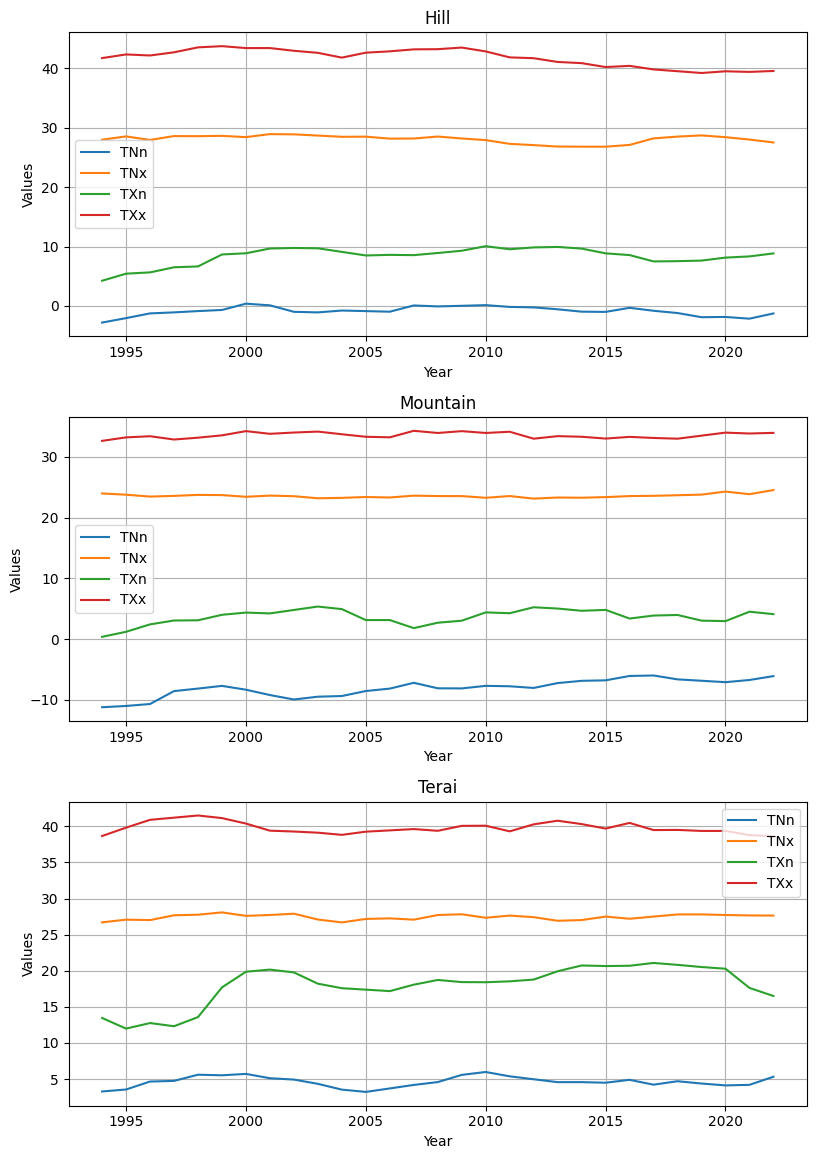

In [9]:
import matplotlib.pyplot as plt

# Create a list of unique geographic regions
regions = yearly_result_df['Geo_region'].unique()

# Set the figure size for A4 paper
fig, axes = plt.subplots(len(regions), 1, figsize=(8.27, 11.69))

# Iterate through each region and create subplots
for i, region in enumerate(regions):
    region_data = yearly_result_df[yearly_result_df['Geo_region'] == region]

    # Calculate the 5-year moving average for the columns
    columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
    for column in columns_to_average:
        region_data[column] = region_data[column].rolling(window=5).mean()

    # Plot the data in the corresponding subplot
    ax = axes[i]
    ax.plot(region_data['Year'], region_data['TNn'], label='TNn')
    ax.plot(region_data['Year'], region_data['TNx'], label='TNx')
    ax.plot(region_data['Year'], region_data['TXn'], label='TXn')
    ax.plot(region_data['Year'], region_data['TXx'], label='TXx')
    ax.set_xlabel('Year')
    ax.set_ylabel('Values')
    ax.set_title(region)
    ax.legend()
    ax.grid(True)

# Adjust subplot spacing and display the plot
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\550024146.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data[column] = region_data[column].rolling(window=5).mean()


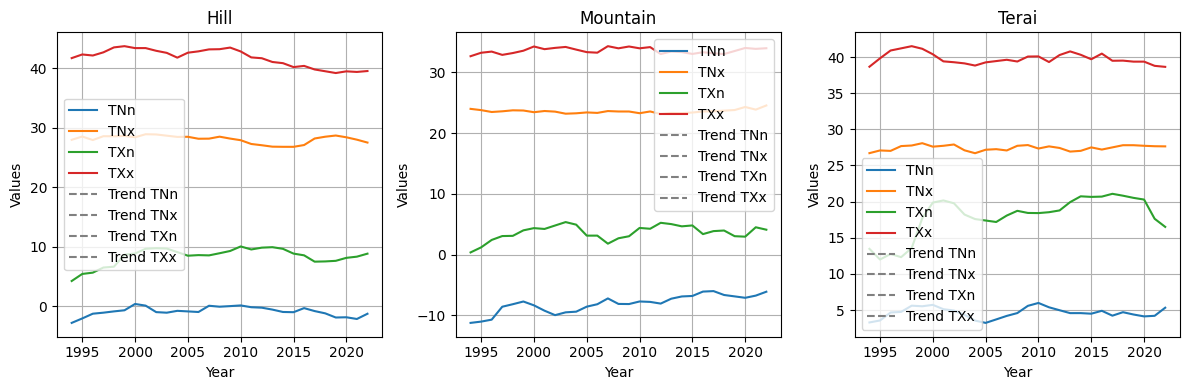

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create a list of unique geographic regions
regions = yearly_result_df['Geo_region'].unique()

# Set the figure size for A4 paper
fig, axes = plt.subplots(1, len(regions), figsize=(12, 4))

# Iterate through each region and create subplots
for i, region in enumerate(regions):
    region_data = yearly_result_df[yearly_result_df['Geo_region'] == region]

    # Calculate the 5-year moving average for the columns
    columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
    for column in columns_to_average:
        region_data[column] = region_data[column].rolling(window=5).mean()

    # Plot the data
    ax = axes[i]
    ax.plot(region_data['Year'], region_data['TNn'], label='TNn')
    ax.plot(region_data['Year'], region_data['TNx'], label='TNx')
    ax.plot(region_data['Year'], region_data['TXn'], label='TXn')
    ax.plot(region_data['Year'], region_data['TXx'], label='TXx')

    # Insert a trend line
    x = region_data['Year']
    for column in columns_to_average:
        y = region_data[column]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        trend_line = intercept + slope * x
        ax.plot(x, trend_line, label=f'Trend {column}', linestyle='--', color='gray')

    ax.set_xlabel('Year')
    ax.set_ylabel('Values')
    ax.set_title(region)
    ax.legend()
    ax.grid(True)

# Adjust subplot spacing and display the plot
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\856512638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data[column] = region_data[column].rolling(window=5).mean()


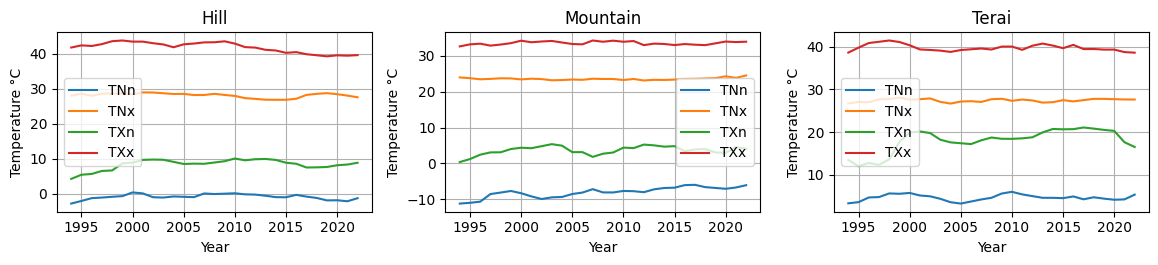

In [11]:
import matplotlib.pyplot as plt

# Create a list of unique geographic regions
regions = yearly_result_df['Geo_region'].unique()

# Set the figure size for A4 paper
fig, axes = plt.subplots(1, len(regions), figsize=(11.69, 2.75))  # Adjust the figsize as needed

# Iterate through each region and create subplots
for i, region in enumerate(regions):
    region_data = yearly_result_df[yearly_result_df['Geo_region'] == region]

    # Calculate the 5-year moving average for the columns
    columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
    for column in columns_to_average:
        region_data[column] = region_data[column].rolling(window=5).mean()

    # Plot the data in the corresponding subplot
    ax = axes[i]
    ax.plot(region_data['Year'], region_data['TNn'], label='TNn')
    ax.plot(region_data['Year'], region_data['TNx'], label='TNx')
    ax.plot(region_data['Year'], region_data['TXn'], label='TXn')
    ax.plot(region_data['Year'], region_data['TXx'], label='TXx')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature °C')
    ax.set_title(region)
    ax.legend()
    ax.grid(True)

# Adjust subplot spacing and display the plot
plt.tight_layout()
plt.show()


In [31]:
import matplotlib.pyplot as plt

# Create a list of unique geographic regions
regions = yearly_result_df['Geo_region'].unique()

# Iterate through each region and create separate plots
for region in regions:
    region_data = yearly_result_df[yearly_result_df['Geo_region'] == region]

    # Calculate the 5-year moving average for the columns
    columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
    for column in columns_to_average:
        region_data[column] = region_data[column].rolling(window=5).mean()

    # Set the figure size for A4 paper
    fig, ax = plt.subplots(figsize=(8.27, 5.83))  # A4 size in inches (landscape orientation)

    # Plot the data in the subplot
    ax.plot(region_data['Year'], region_data['TNn'], label='TNn')
    ax.plot(region_data['Year'], region_data['TNx'], label='TNx')
    ax.plot(region_data['Year'], region_data['TXn'], label='TXn')
    ax.plot(region_data['Year'], region_data['TXx'], label='TXx')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature °C')
    ax.set_title(region)
    ax.legend()
    ax.grid(True)

    # Adjust subplot spacing and save each plot with the region's name
    plt.tight_layout()
    plot_filename = f'{region}_Temperature_Plot.png'  # Modify the filename as needed
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close(fig)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\4132707400.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data[column] = region_data[column].rolling(window=5).mean()


### for seasonal

In [12]:
for_seasonal_etccdi_data = temperature_data.copy()

for_seasonal_etccdi_data = for_seasonal_etccdi_data.drop(['Unnamed: 0', 'Station'], axis=1)
for_seasonal_etccdi_data['Date'] = pd.to_datetime(for_seasonal_etccdi_data['Date'])
for_seasonal_etccdi_data['Month'] = for_seasonal_etccdi_data['Date'].dt.month
month_to_season = {
    1: 'Winter',         # January
    2: 'Winter',         # February
    3: 'Premonsoon',     # March
    4: 'Premonsoon',     # April
    5: 'Premonsoon',     # May
    6: 'Monsoon',        # June
    7: 'Monsoon',        # July
    8: 'Monsoon',        # August
    9: 'Monsoon',    # September
    10: 'Postmonsoon',   # October
    11: 'Postmonsoon',   # November
    12: 'Winter'         # December
}

# Use the map function to create the 'Season' column
for_seasonal_etccdi_data['Season'] = for_seasonal_etccdi_data['Month'].map(month_to_season)


In [13]:
print(for_seasonal_etccdi_data)

       Geo_region       Date      Max T      Min T      Avg T  Month  Season
0        Mountain 1990-01-01   9.578267  16.865993  13.222130      1  Winter
1        Mountain 1990-01-02  10.074733  12.336708  11.205721      1  Winter
2        Mountain 1990-01-03   8.822569  25.611077  17.216823      1  Winter
3        Mountain 1990-01-04  12.803830   6.503694   9.653762      1  Winter
4        Mountain 1990-01-05  10.202334  12.335740  11.269037      1  Winter
...           ...        ...        ...        ...        ...    ...     ...
216931       Hill 2022-12-27  21.000000   6.000000  13.500000     12  Winter
216932       Hill 2022-12-28  19.500000   5.500000  12.500000     12  Winter
216933       Hill 2022-12-29  18.500000   6.500000  12.500000     12  Winter
216934       Hill 2022-12-30  20.000000   7.500000  13.750000     12  Winter
216935       Hill 2022-12-31  20.000000   8.500000  14.250000     12  Winter

[216936 rows x 7 columns]


In [14]:
import pandas as pd
import numpy as np

# Assuming you have the data in a DataFrame called 'temperature_data'
# Make sure to replace 'temperature_data' with your actual DataFrame


In [15]:

# Define the index columns
season_index_columns = ["Geo_region", "Year", "Season", "TNn", "TNx", "TXn", "TXx", "TN10p", "TN90p", "TX10p", "TX90p"]

# Initialize an empty list to store DataFrames for each 'Geo_region'
season_result_dfs = []


# Loop through each 'Geo_region'
for geo_region, geo_region_data in for_seasonal_etccdi_data.groupby('Geo_region'):
    # Loop through each year and season
    for year, season_data in geo_region_data.groupby(geo_region_data['Date'].dt.year):
        for season in for_seasonal_etccdi_data['Season'].unique():
            # Filter data for the specific year and month
            seasonal_data = season_data[season_data['Season'] == season]

            # Calculate the indices
            TNn = np.min(seasonal_data['Min T'])
            TNx = np.max(seasonal_data['Min T'])
            TXn = np.min(seasonal_data['Max T'])
            TXx = np.max(seasonal_data['Max T'])
            
            TN10p = np.mean(seasonal_data['Min T'] < np.percentile(seasonal_data['Min T'], 10))
            TN90p = np.mean(seasonal_data['Min T'] > np.percentile(seasonal_data['Min T'], 90))
            TX10p = np.mean(seasonal_data['Max T'] < np.percentile(seasonal_data['Max T'], 10))
            TX90p = np.mean(seasonal_data['Max T'] > np.percentile(seasonal_data['Max T'], 90))

            # Create a DataFrame to store the calculated values
            data_dict = {
                "Geo_region": geo_region,
                
                "Year": year,
                "Season": season,
                "TNn": TNn,
                "TNx": TNx,
                "TXn": TXn,
                "TXx": TXx, 
                
                "TN10p": TN10p,
                "TN90p": TN90p,
                "TX10p": TX10p,
                "TX90p": TX90p
            }
            season_result_df = pd.DataFrame([data_dict])

            # Append the data to the list of DataFrames
            season_result_dfs.append(season_result_df)

# Concatenate the DataFrames for all 'Geo_region' into a single result DataFrame
season_result_df = pd.concat(season_result_dfs, ignore_index=True)

In [16]:
season_result_df

Geo_region  Year       Season        TNn        TNx        TXn        TXx  \
0         Hill  1990       Winter  -8.939842  15.196031   3.267721  28.500000   
1         Hill  1990   Premonsoon   0.700000  22.800000   7.099203  39.611019   
2         Hill  1990      Monsoon  13.225000  26.557076  17.300000  40.441107   
3         Hill  1990  Postmonsoon   6.000000  22.523423   9.408605  36.475174   
4         Hill  1991       Winter  -2.081612  15.388686   5.911761  28.500000   
..         ...   ...          ...        ...        ...        ...        ...   
391      Terai  2021  Postmonsoon  13.500000  25.400000  26.400000  36.200000   
392      Terai  2022       Winter   6.700000  15.700000  16.399842  29.600000   
393      Terai  2022   Premonsoon  12.400000  26.500000  26.200000  38.700000   
394      Terai  2022      Monsoon  16.900000  27.900000  25.700000  35.700000   
395      Terai  2022  Postmonsoon  13.400000  25.000000  26.900000  35.000000   

        TN10p     TN90p     TX10p     TX90p  
0    0.100000  0.095556  0.098889  0.097778  
1    0.100000  0.096739  0.090217  0.100000  
2    0.086066  0.100000  0.100000  0.090984  
3    0.100000  0.100000  0.100000  0.100000  
4    0.095556  0.100000  0.100000  0.100000  
..        ...       ...       ...       ...  
391  0.081967  0.098361  0.098361  0.098361  
392  0.100000  0.088889  0.100000  0.066667  
393  0.108696  0.097826  0.108696  0.076087  
394  0.106557  0.090164  0.098361  0.098361  
395  0.098361  0.098361  0.098361  0.098361  

[396 rows x 11 columns]

season_result_df.to_csv('G:/fresh_start/main_thesis/data/work_data/etccdi_season_result_df.csv')

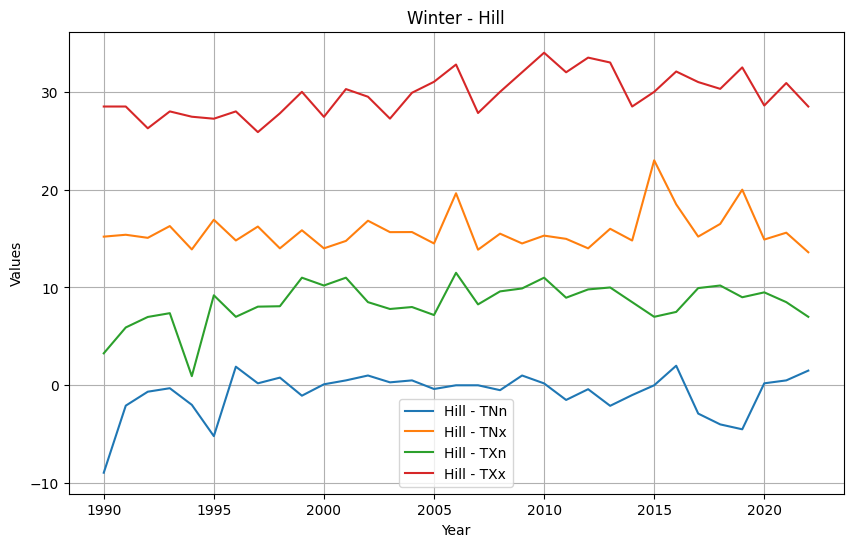

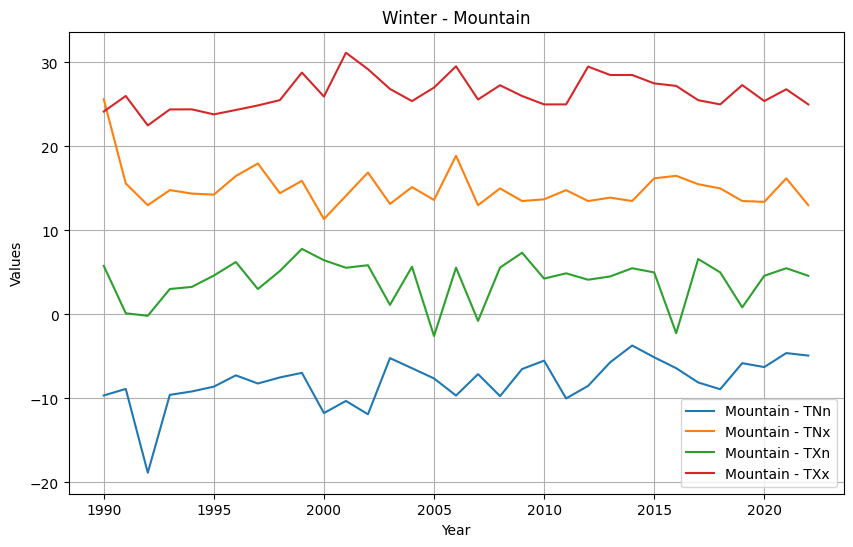

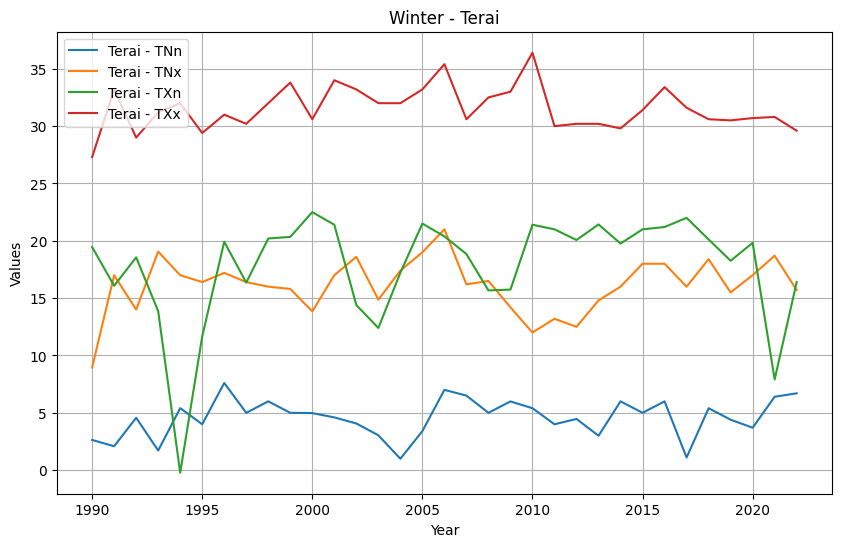

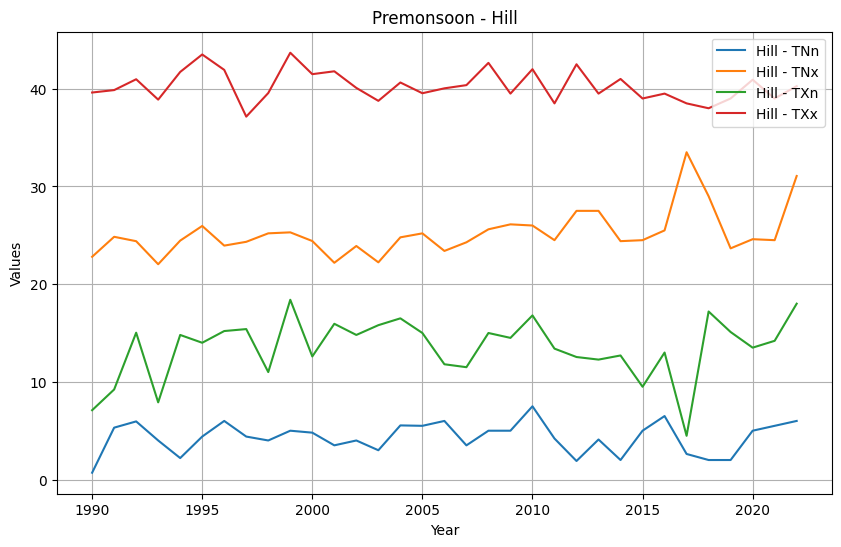

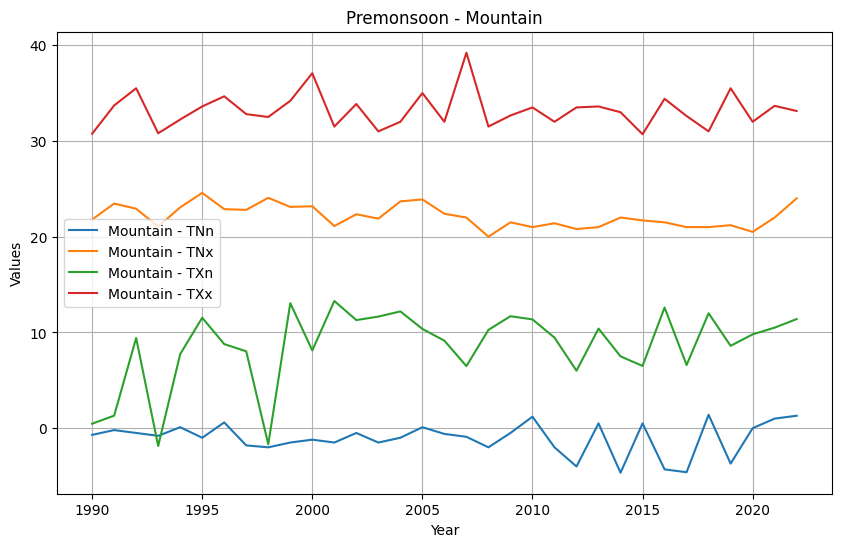

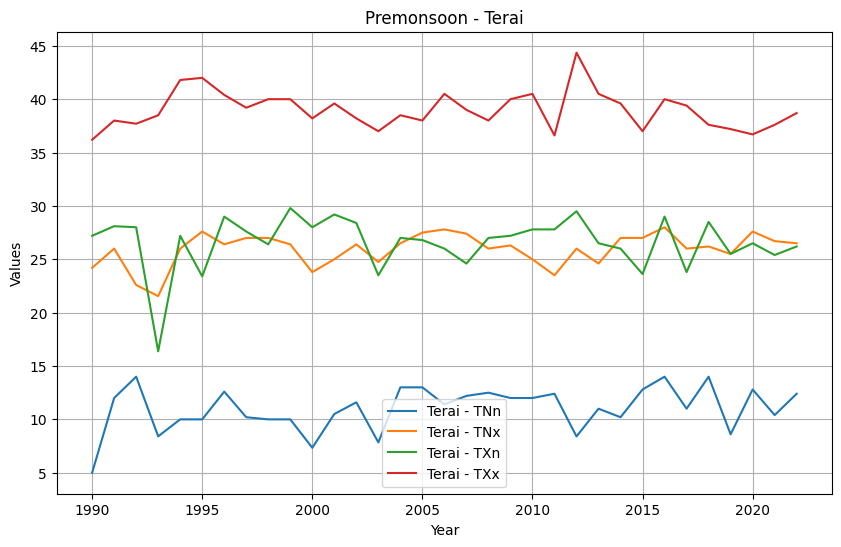

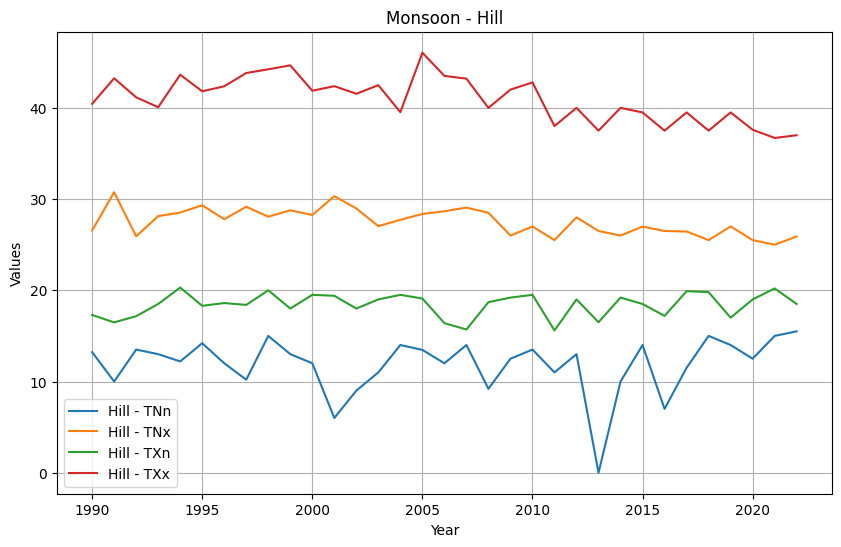

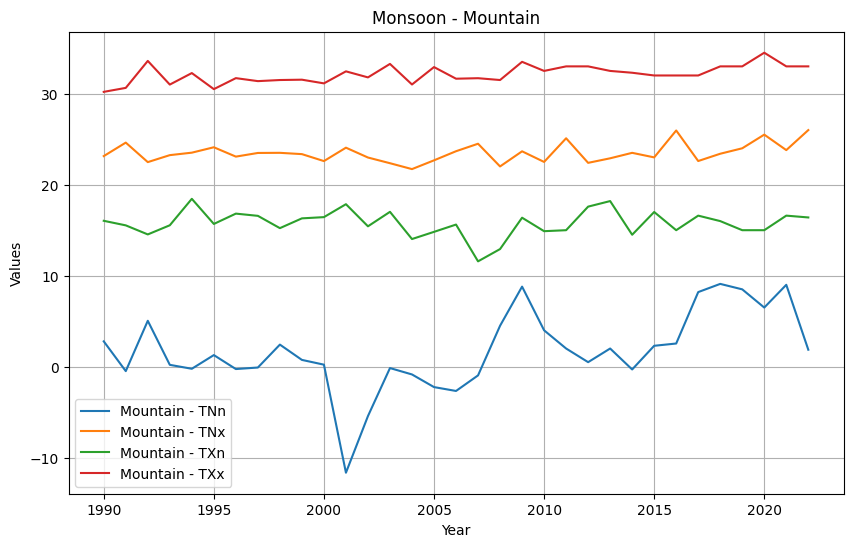

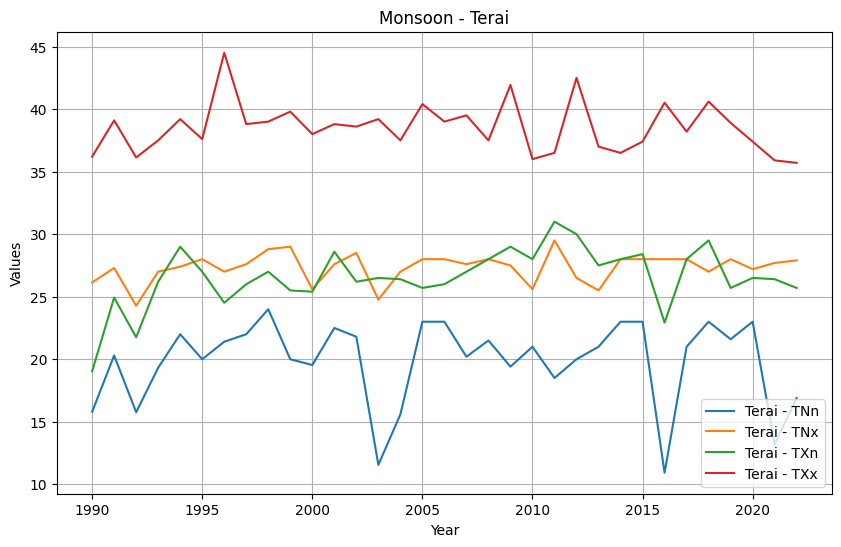

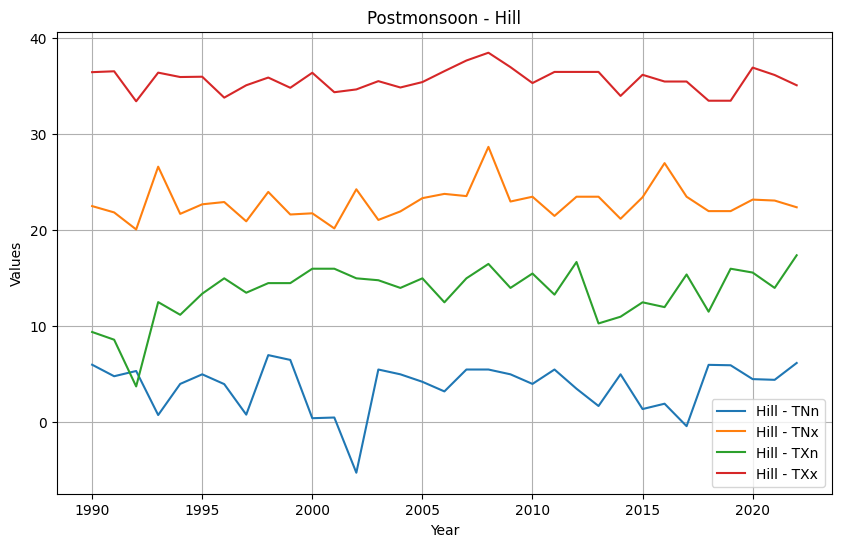

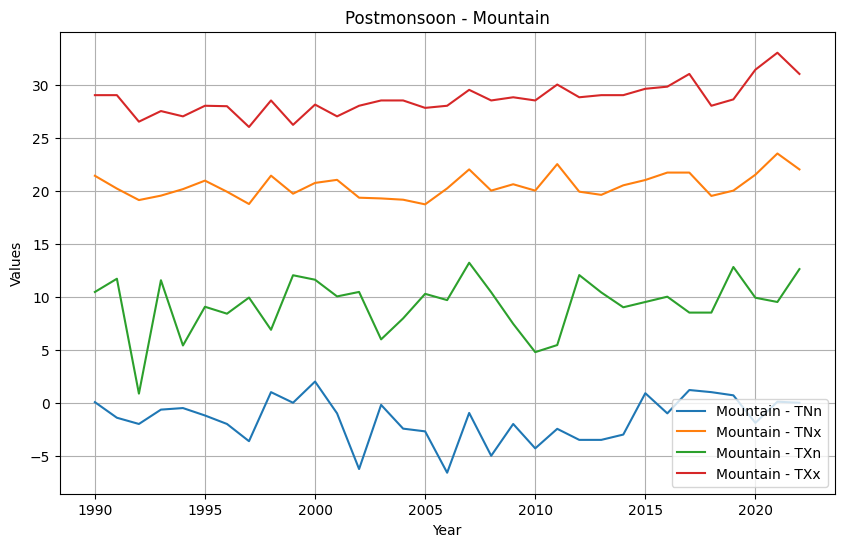

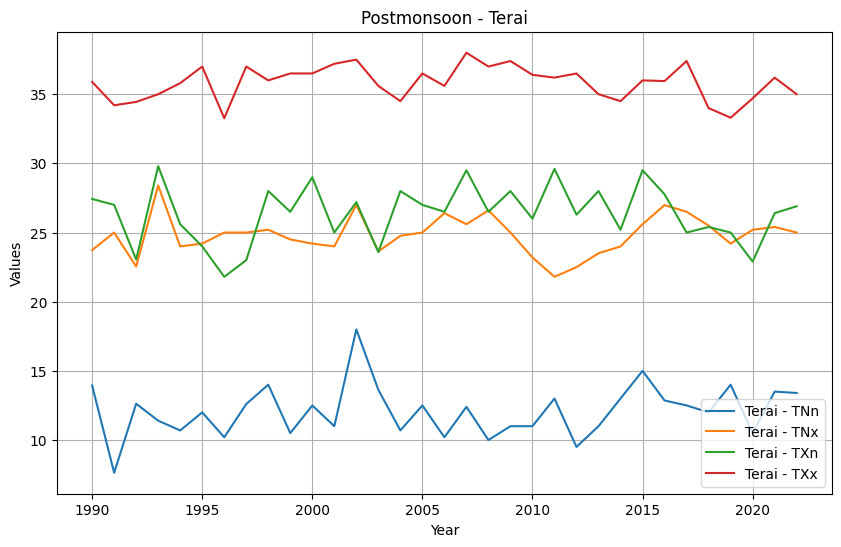

In [17]:
import matplotlib.pyplot as plt

# Create a list of unique seasons
seasons = season_result_df['Season'].unique()

# Iterate through each season and create a separate plot
for season in seasons:
    # Filter data for the current season
    season_data = season_result_df[season_result_df['Season'] == season]

    # Create a separate plot for each Geo_region
    for geo_region in season_data['Geo_region'].unique():
        geo_data = season_data[season_data['Geo_region'] == geo_region]

        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(geo_data['Year'], geo_data['TNn'], label=f'{geo_region} - TNn')
        plt.plot(geo_data['Year'], geo_data['TNx'], label=f'{geo_region} - TNx')
        plt.plot(geo_data['Year'], geo_data['TXn'], label=f'{geo_region} - TXn')
        plt.plot(geo_data['Year'], geo_data['TXx'], label=f'{geo_region} - TXx')
        plt.xlabel('Year')
        plt.ylabel('Values')
        plt.title(f'{season} - {geo_region}')
        plt.legend()
        plt.grid(True)

        # Save the plot as an image or display it
        # You can use plt.savefig('your_plot_name.png') to save the plot as an image
        # Or use plt.show() to display it in the notebook

        # If you want to save each plot with a unique name, you can use a combination of season and geo_region in the filename.

# To display all the plots, you can use plt.show() at the end of the loop.
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\3413094011.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data[column] = geo_data[column].rolling(window=10).mean()


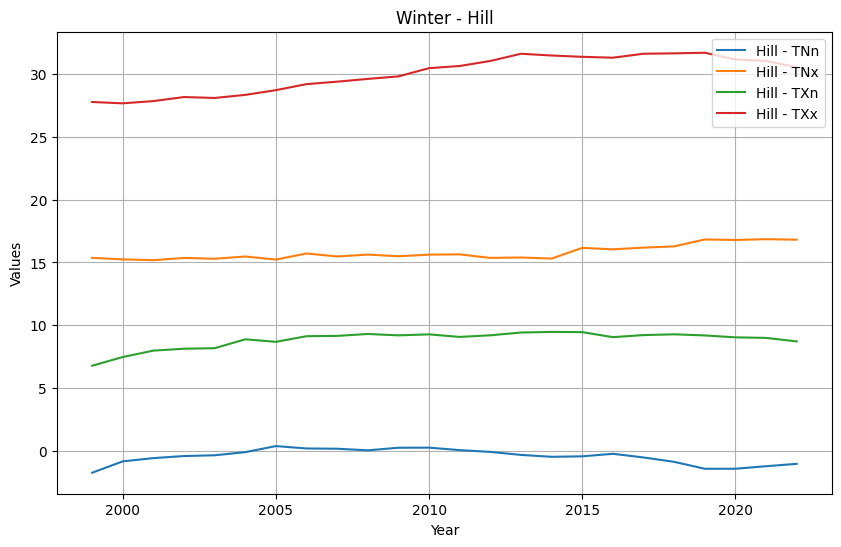

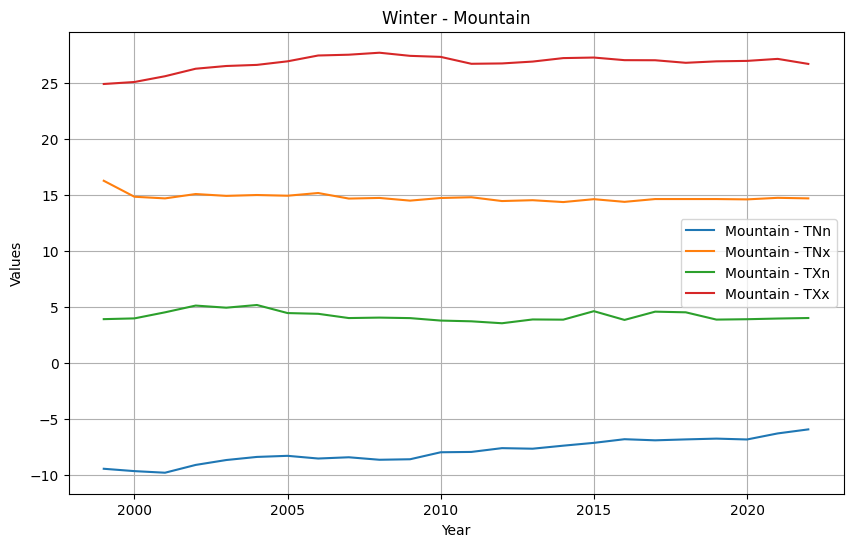

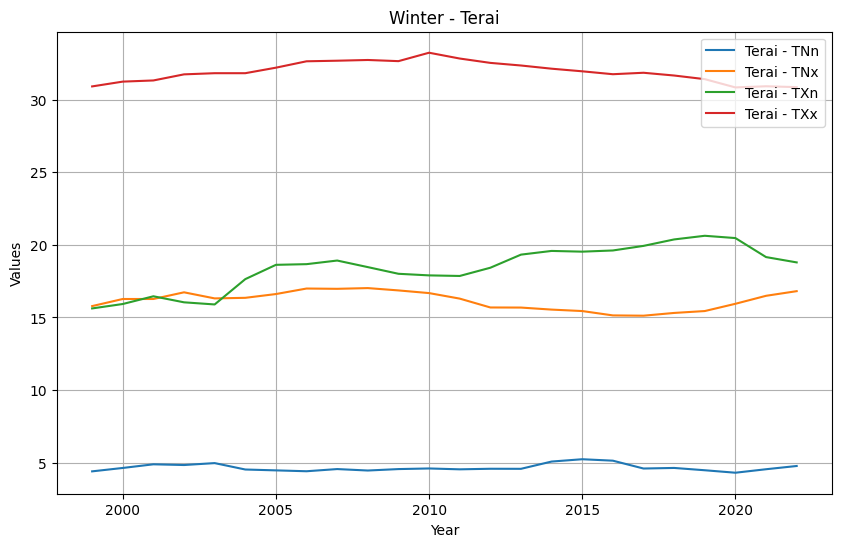

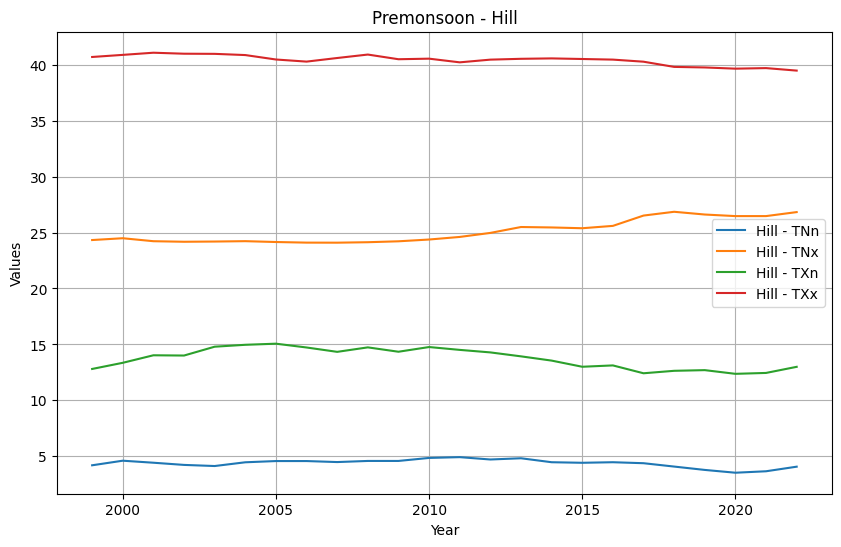

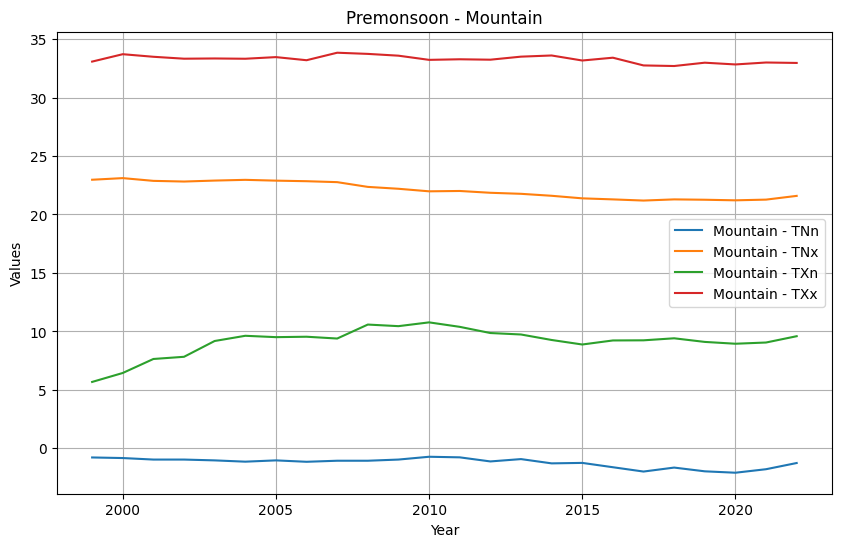

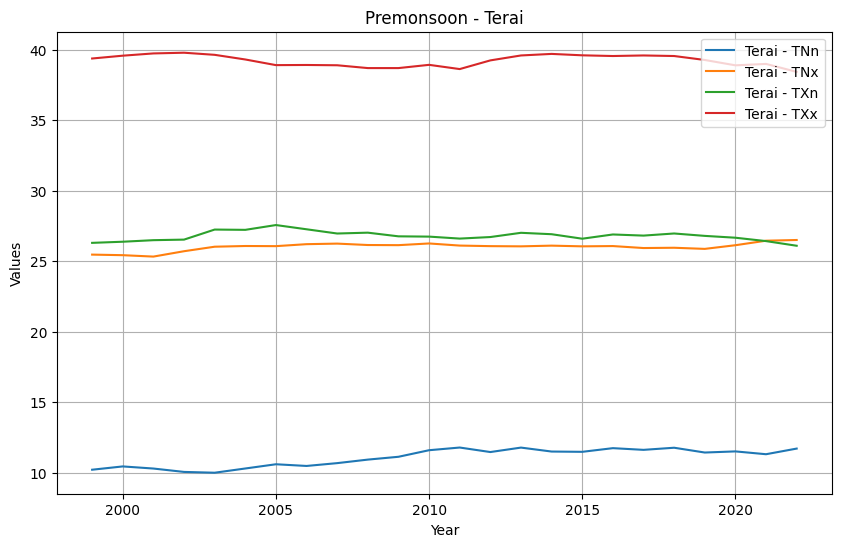

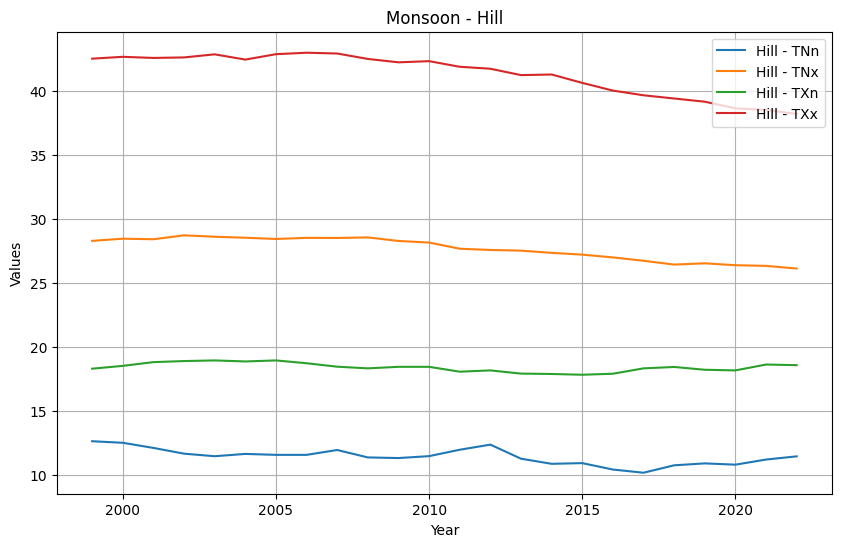

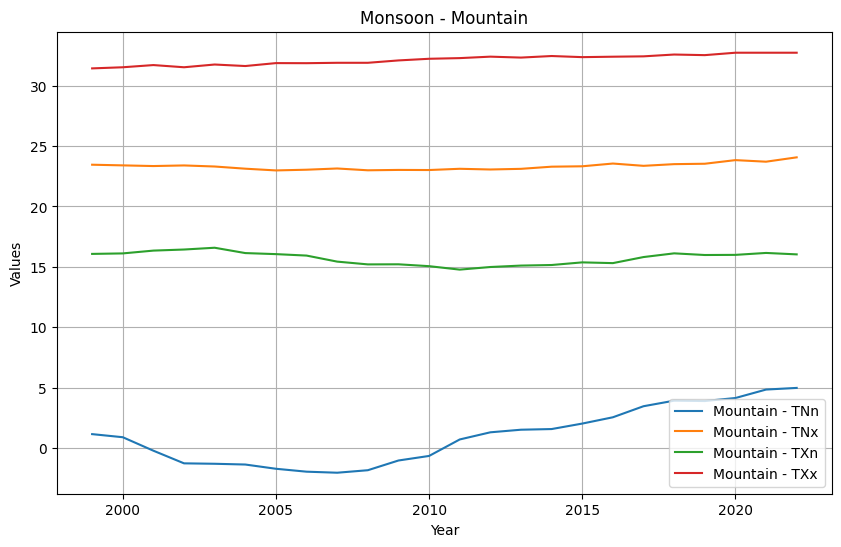

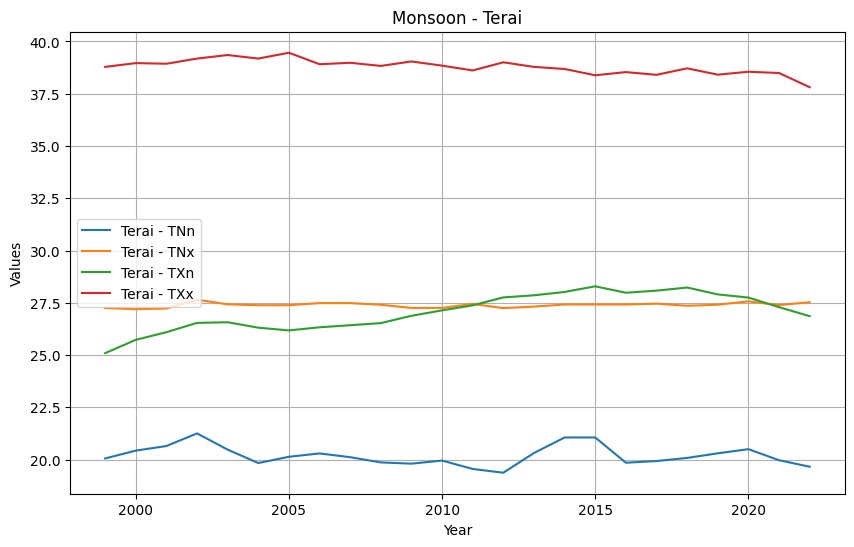

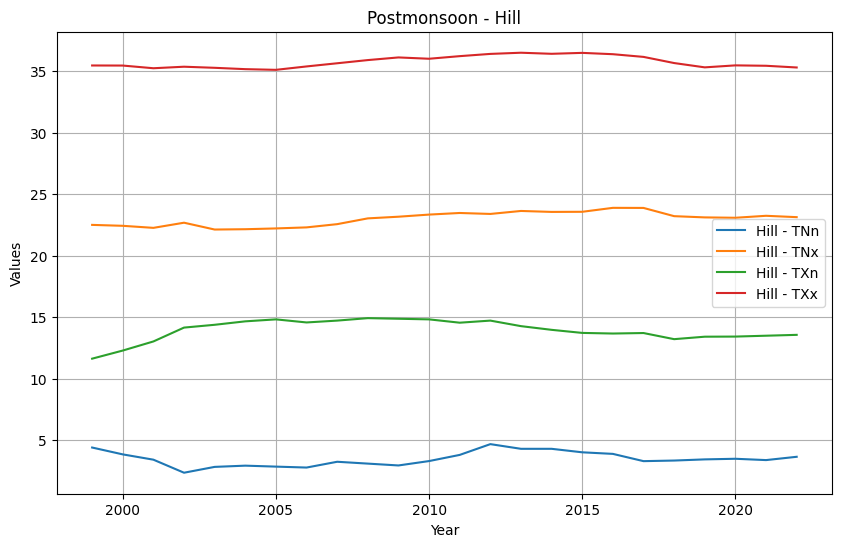

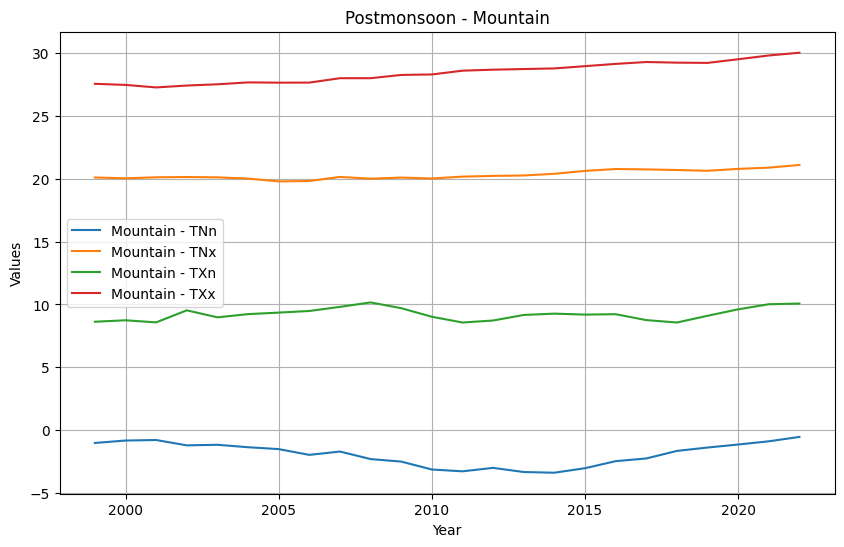

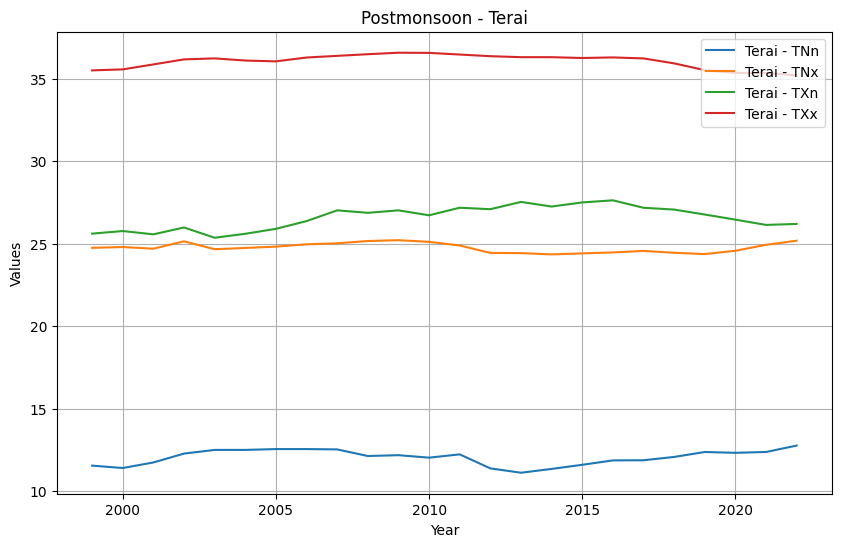

In [18]:
import matplotlib.pyplot as plt

# Create a list of unique seasons
seasons = season_result_df['Season'].unique()

# Iterate through each season and create a separate plot
for season in seasons:
    # Filter data for the current season
    season_data = season_result_df[season_result_df['Season'] == season]

    # Create a separate plot for each Geo_region
    for geo_region in season_data['Geo_region'].unique():
        geo_data = season_data[season_data['Geo_region'] == geo_region]

        # Calculate the 5-year moving average for the columns
        columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
        for column in columns_to_average:
            geo_data[column] = geo_data[column].rolling(window=10).mean()

        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(geo_data['Year'], geo_data['TNn'], label=f'{geo_region} - TNn')
        plt.plot(geo_data['Year'], geo_data['TNx'], label=f'{geo_region} - TNx')
        plt.plot(geo_data['Year'], geo_data['TXn'], label=f'{geo_region} - TXn')
        plt.plot(geo_data['Year'], geo_data['TXx'], label=f'{geo_region} - TXx')
        plt.xlabel('Year')
        plt.ylabel('Values')
        plt.title(f'{season} - {geo_region}')
        plt.legend()
        plt.grid(True)

        # Save the plot as an image or display it
        # You can use plt.savefig('your_plot_name.png') to save the plot as an image
        # Or use plt.show() to display it in the notebook

        # If you want to save each plot with a unique name, you can use a combination of season and geo_region in the filename.

# To display all the plots, you can use plt.show() at the end of the loop.
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\1163592656.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data[column] = geo_data[column].rolling(window=10).mean()


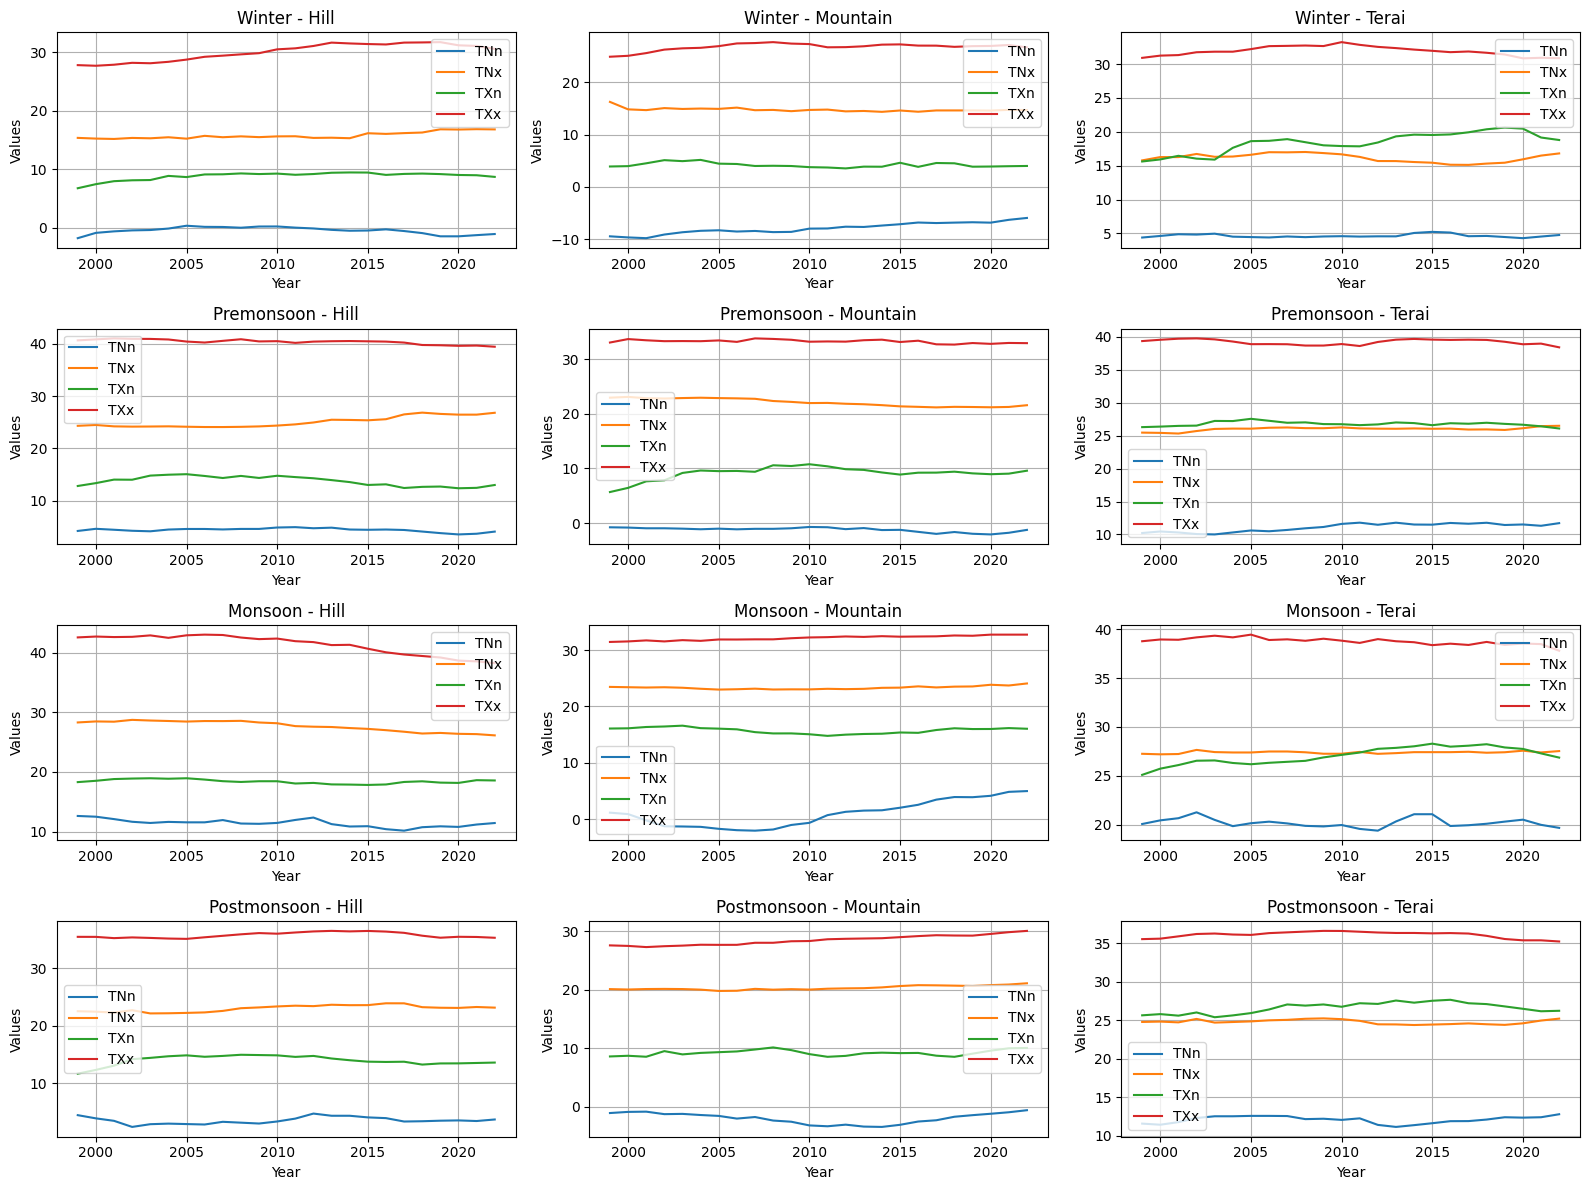

In [19]:
import matplotlib.pyplot as plt

# Create a list of unique seasons
seasons = season_result_df['Season'].unique()

# Create a single plot with subplots for each geographic region
fig, axes = plt.subplots(len(seasons), len(season_result_df['Geo_region'].unique()), figsize=(16, 12))

# Iterate through each season and create subplots
for i, season in enumerate(seasons):
    season_data = season_result_df[season_result_df['Season'] == season]

    # Iterate through each geographic region
    for j, geo_region in enumerate(season_data['Geo_region'].unique()):
        geo_data = season_data[season_data['Geo_region'] == geo_region]

        # Calculate the 5-year moving average for the columns
        columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
        for column in columns_to_average:
            geo_data[column] = geo_data[column].rolling(window=10).mean()

        # Plot the data in the corresponding subplot
        ax = axes[i, j]
        ax.plot(geo_data['Year'], geo_data['TNn'], label=f'TNn')
        ax.plot(geo_data['Year'], geo_data['TNx'], label=f'TNx')
        ax.plot(geo_data['Year'], geo_data['TXn'], label=f'TXn')
        ax.plot(geo_data['Year'], geo_data['TXx'], label=f'TXx')
        ax.set_xlabel('Year')
        ax.set_ylabel('Values')
        ax.set_title(f'{season} - {geo_region}')
        ax.legend()
        ax.grid(True)

# Adjust subplot spacing and display the plot
plt.tight_layout()
plt.show()

In [20]:
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# Create a folder to save seasonal plots if it doesn't exist
folder_name = 'Seasonal_Plots'
os.makedirs(folder_name, exist_ok=True)

# Set font properties
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
prop = fm.FontProperties(fname=font_path[0], size=12)

# Create a list of unique seasons
seasons = season_result_df['Season'].unique()

# Define labels for subplots
subplot_labels = ['a', 'b', 'c', 'd']  # Extend if needed

# Iterate through each season and create subplots
for season in seasons:
    season_data = season_result_df[season_result_df['Season'] == season]

    # Create a single plot with subplots for each geographic region
    fig, axes = plt.subplots(1, len(season_result_df['Geo_region'].unique()), figsize=(16, 6))

    # Iterate through each geographic region
    for j, (geo_region, label) in enumerate(zip(season_data['Geo_region'].unique(), subplot_labels)):
        geo_data = season_data[season_data['Geo_region'] == geo_region]

        # Calculate the 5-year moving average for the columns
        columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
        for column in columns_to_average:
            geo_data[column] = geo_data[column].rolling(window=10).mean()

        # Plot the data in the corresponding subplot
        ax = axes[j]
        ax.plot(geo_data['Year'], geo_data['TNn'], label=f'TNn')
        ax.plot(geo_data['Year'], geo_data['TNx'], label=f'TNx')
        ax.plot(geo_data['Year'], geo_data['TXn'], label=f'TXn')
        ax.plot(geo_data['Year'], geo_data['TXx'], label=f'TXx')
        ax.set_xlabel('Year', fontproperties=prop)
        ax.set_ylabel('Temperature', fontproperties=prop)
        ax.set_title(f'{season} - {geo_region}', fontproperties=prop)
        ax.legend(prop=prop)
        ax.grid(True)

        # Add subplot index labels at the bottom
        ax.text(0.5, -0.15, f'({label})', ha='center', va='center', transform=ax.transAxes, fontsize=12, fontproperties=prop)

    # Adjust subplot spacing and save the plot in the folder with the season's name
    plt.tight_layout()
    season_filename = f'{folder_name}/Seasonal_Plot_{season}.png'
    plt.savefig(season_filename, dpi=300, bbox_inches='tight')
    plt.close(fig)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\2217907136.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data[column] = geo_data[column].rolling(window=10).mean()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\2891265844.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data[column] = geo_data[column].rolling(window=5).mean()


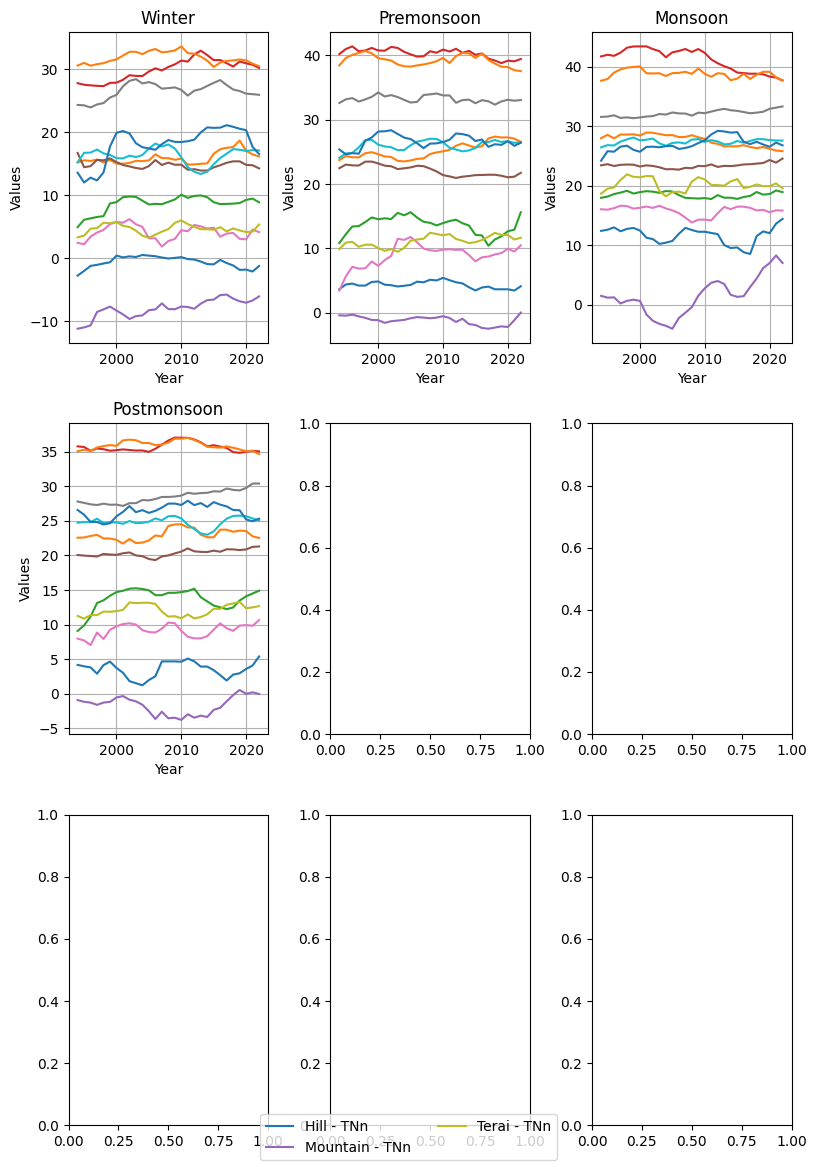

In [21]:
import matplotlib.pyplot as plt

# Create a list of unique seasons
seasons = season_result_df['Season'].unique()

# Set the figure size for A4 paper
fig, axes = plt.subplots(3, 3, figsize=(8.27, 11.69))  # A4 paper size in inches (8.27x11.69)

# Create a dictionary to store legend information
legend_info = {}

# Iterate through each season and create subplots
for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = season_result_df[season_result_df['Season'] == season]

    # Create subplots in a 3x3 grid
    row, col = i // 3, i % 3
    ax = axes[row, col]

    # Iterate through Geo_regions
    for geo_region in season_data['Geo_region'].unique():
        geo_data = season_data[season_data['Geo_region'] == geo_region]

        # Calculate the 5-year moving average for the columns
        columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
        for column in columns_to_average:
            geo_data[column] = geo_data[column].rolling(window=5).mean()

        # Plot the data and store legend information
        line, = ax.plot(geo_data['Year'], geo_data['TNn'], label=f'{geo_region} - TNn')
        legend_info[f'{geo_region} - TNn'] = line

        ax.plot(geo_data['Year'], geo_data['TNx'], label=f'{geo_region} - TNx')
        ax.plot(geo_data['Year'], geo_data['TXn'], label=f'{geo_region} - TXn')
        ax.plot(geo_data['Year'], geo_data['TXx'], label=f'{geo_region} - TXx')

    ax.set_xlabel('Year')
    ax.set_ylabel('Values')
    ax.set_title(season)
    ax.grid(True)

# Create a single legend for all subplots
fig.legend(legend_info.values(), legend_info.keys(), loc='lower center', ncol=2)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()


### For monthly

In [22]:


# Convert the 'Date' column to datetime
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

# Define the index columns
index_columns = ["Geo_region", "Station", "Year", "Month", "TNn", "TNx", "TXn", "TXx", "TN10p", "TN90p", "TX10p", "TX90p"]

# Initialize an empty list to store DataFrames for each 'Geo_region'
result_dfs = []


# Loop through each 'Geo_region'
for geo_region, geo_region_data in temperature_data.groupby('Geo_region'):
    # Loop through each year and month
    for year, month_data in geo_region_data.groupby(geo_region_data['Date'].dt.year):
        for month in range(1, 13):
            # Filter data for the specific year and month
            monthly_data = month_data[month_data['Date'].dt.month == month]

            # Calculate the indices
            TNn = np.min(monthly_data['Min T'])
            TNx = np.max(monthly_data['Min T'])
            TXn = np.min(monthly_data['Max T'])
            TXx = np.max(monthly_data['Max T'])
            
            TN10p = np.mean(monthly_data['Min T'] < np.percentile(monthly_data['Min T'], 10))
            TN90p = np.mean(monthly_data['Min T'] > np.percentile(monthly_data['Min T'], 90))
            TX10p = np.mean(monthly_data['Max T'] < np.percentile(monthly_data['Max T'], 10))
            TX90p = np.mean(monthly_data['Max T'] > np.percentile(monthly_data['Max T'], 90))

            # Create a DataFrame to store the calculated values
            data_dict = {
                "Geo_region": geo_region,
                "Station": monthly_data['Station'].iloc[0],
                "Year": year,
                "Month": month,
                "TNn": TNn,
                "TNx": TNx,
                "TXn": TXn,
                "TXx": TXx, 
                
                "TN10p": TN10p,
                "TN90p": TN90p,
                "TX10p": TX10p,
                "TX90p": TX90p
            }
            result_df = pd.DataFrame([data_dict])

            # Append the data to the list of DataFrames
            result_dfs.append(result_df)

# Concatenate the DataFrames for all 'Geo_region' into a single result DataFrame
result_df = pd.concat(result_dfs, ignore_index=True)


In [23]:
result_df.to_excel('G:/fresh_start/main_thesis/data/final_datas/etccdi_monthly_result_df.xlsx')

In [24]:
print(result_df)

     Geo_region  Station  Year  Month        TNn        TNx        TXn  \
0          Hill     1024  1990      1  -8.939842  15.196031   3.463189   
1          Hill     1024  1990      2   0.500000  12.356745   3.267721   
2          Hill     1024  1990      3   0.700000  17.825521   7.099203   
3          Hill     1024  1990      4   4.753237  20.176975  14.400000   
4          Hill     1024  1990      5  10.400000  22.800000  19.500000   
...         ...      ...   ...    ...        ...        ...        ...   
1183      Terai     1212  2022      8  20.600000  27.900000  28.100000   
1184      Terai     1212  2022      9  18.800000  26.500000  27.200000   
1185      Terai     1212  2022     10  16.500000  25.000000  26.900000   
1186      Terai     1212  2022     11  13.400000  18.000000  27.500000   
1187      Terai     1212  2022     12   8.500000  13.600000  18.825789   

            TXx     TN10p     TN90p     TX10p     TX90p  
0     27.000000  0.100000  0.093548  0.100000  0.1000

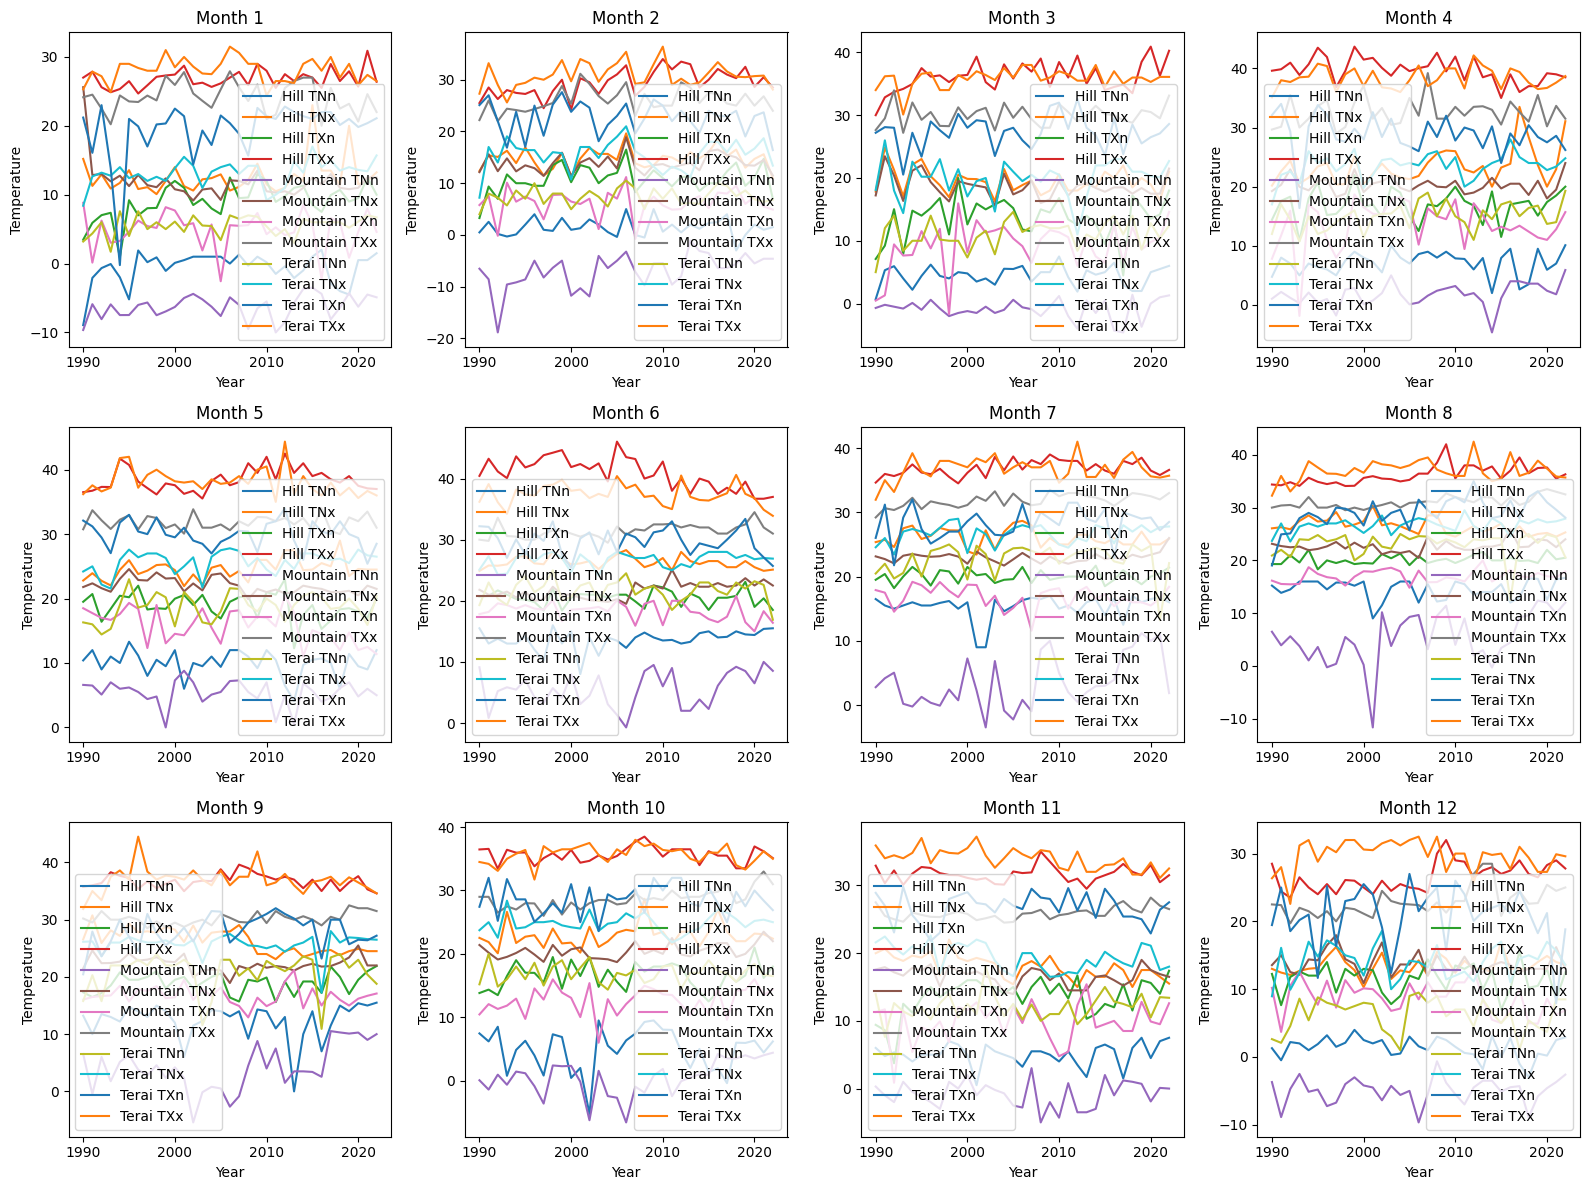

In [25]:
import matplotlib.pyplot as plt

# Create subplots for 12 months
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
months = range(1, 13)

for i, month in enumerate(months):
    # Filter data for the current month
    month_data = result_df[result_df['Month'] == month]

    for geo_region in result_df['Geo_region'].unique():
        # Filter data for the current Geo_region
        region_data = month_data[month_data['Geo_region'] == geo_region]

        # Plot year vs. Geo_region for the current month
        ax = axes[i // 4, i % 4]  # Get the subplot
        ax.plot(region_data['Year'], region_data['TNn'], label=f'{geo_region} TNn')
        ax.plot(region_data['Year'], region_data['TNx'], label=f'{geo_region} TNx')
        ax.plot(region_data['Year'], region_data['TXn'], label=f'{geo_region} TXn')
        ax.plot(region_data['Year'], region_data['TXx'], label=f'{geo_region} TXx')

        ax.set_title(f'Month {month}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Temperature')
        ax.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


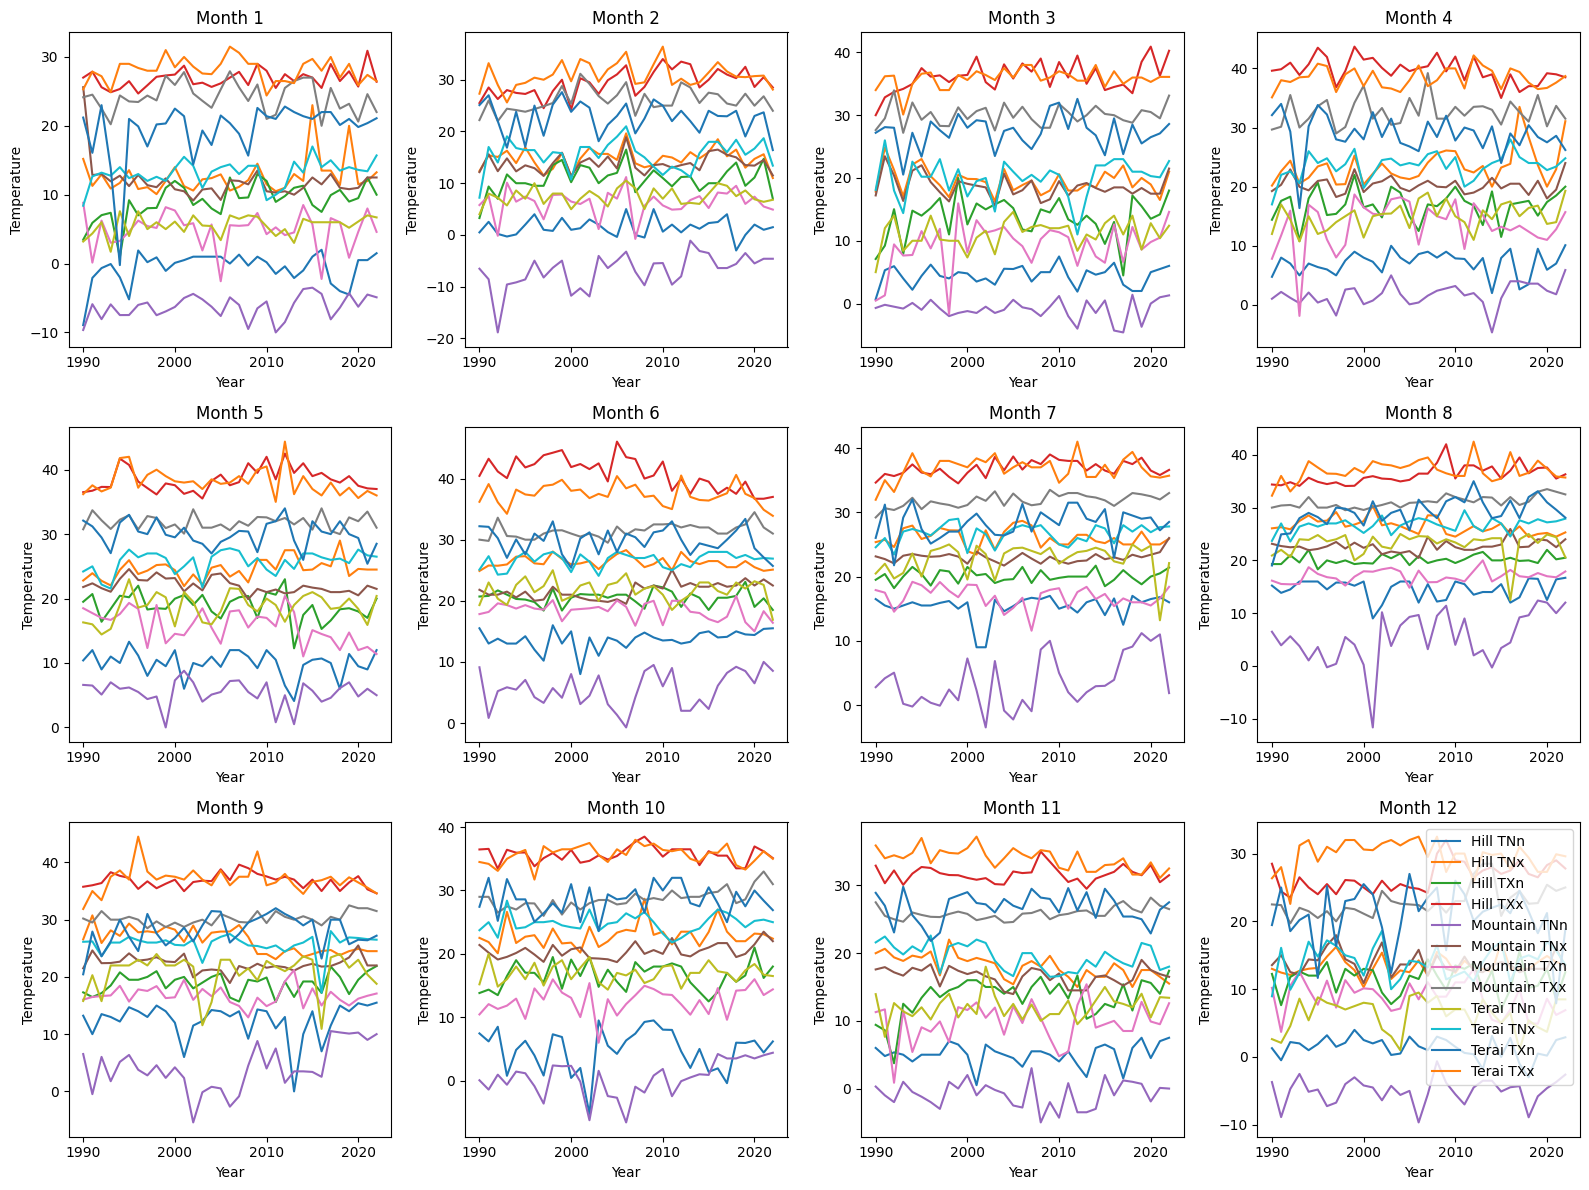

In [26]:
import matplotlib.pyplot as plt

# Create subplots for 12 months
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
months = range(1, 13)

for i, month in enumerate(months):
    # Filter data for the current month
    month_data = result_df[result_df['Month'] == month]

    for geo_region in result_df['Geo_region'].unique():
        # Filter data for the current Geo_region
        region_data = month_data[month_data['Geo_region'] == geo_region]

        # Plot year vs. Geo_region for the current month
        ax = axes[i // 4, i % 4]  # Get the subplot
        ax.plot(region_data['Year'], region_data['TNn'], label=f'{geo_region} TNn')
        ax.plot(region_data['Year'], region_data['TNx'], label=f'{geo_region} TNx')
        ax.plot(region_data['Year'], region_data['TXn'], label=f'{geo_region} TXn')
        ax.plot(region_data['Year'], region_data['TXx'], label=f'{geo_region} TXx')

        ax.set_title(f'Month {month}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Temperature')

# Place the legend in the upper right corner of the last subplot
axes[2, 3].legend(loc='upper right')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [27]:

mountain_temp_data = result_df[result_df['Geo_region'] == 'Mountain'][['Year','Month', 'TNn', 'TNx', 'TXn', 'TXx']]
mountain_temp_data = mountain_temp_data.set_index('Year')


In [28]:
print(mountain_temp_data)

      Month        TNn        TNx        TXn        TXx
Year                                                   
1990      1  -9.645752  25.611077   8.822569  24.152111
1990      2  -6.523974  12.142306   5.780255  22.200000
1990      3  -0.700000  17.219962   0.465344  27.636169
1990      4   1.043651  19.253169   7.805863  29.658191
1990      5   6.600000  21.787733  18.500000  30.750707
...     ...        ...        ...        ...        ...
2022      8  12.000000  24.000000  17.900000  32.500000
2022      9  10.000000  22.000000  17.100000  31.500000
2022     10   4.400000  22.000000  14.400000  31.000000
2022     11   0.000000  16.500000  12.600000  26.500000
2022     12  -2.600000  13.000000   6.900000  25.000000

[396 rows x 5 columns]


In [29]:
import os
import calendar
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# Create a folder to save monthly plots if it doesn't exist
folder_name = 'Monthly_Plots'
os.makedirs(folder_name, exist_ok=True)

# Set font properties
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
prop = fm.FontProperties(fname=font_path[0], size=12)

# Group data by month
grouped_by_month = result_df.groupby('Month')

for month, month_data in grouped_by_month:
    fig, ax = plt.subplots(figsize=(8, 6))

    for geo_region in month_data['Geo_region'].unique():
        # Filter data for the current Geo_region
        region_data = month_data[month_data['Geo_region'] == geo_region]

        # Calculate the 30-day running average for temperature variables
        columns_to_average = ['TNn', 'TNx', 'TXn', 'TXx']
        for column in columns_to_average:
            region_data[f'{column}'] = region_data[column].rolling(window=5).mean()

            # Plot 30-day running average temperature variables for the current Geo_region in the current month
            ax.plot(region_data['Year'], region_data[f'{column}'], label=f'{geo_region} {column}')

    month_name = calendar.month_name[month]  # Get the month name
    ax.set_title(f'Month {month_name}', fontproperties=prop)  # Set title font properties
    ax.set_xlabel('Year', fontproperties=prop)  # Set xlabel font properties
    ax.set_ylabel('Temperature', fontproperties=prop)  # Set ylabel font properties
    ax.legend()

    # Save the plot in the folder with the month's name
    plot_filename = f'{folder_name}/Monthly_Plot_{month_name}.png'
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close(fig)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4204\3443143217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data[f'{column}'] = region_data[column].rolling(window=5).mean()


In [30]:

hill_temp_data = result_df[result_df['Geo_region'] == 'Hill'][['Station','Date', 'Max T', 'Min T', 'Avg T']]

terai_temp_data = result_df[result_df['Geo_region'] == 'Terai'][['Station','Date', 'Max T', 'Min T', 'Avg T']]





KeyError: "['Date', 'Max T', 'Min T', 'Avg T'] not in index"

In [ ]:
t_d_2 = temperature_data
t_d_2 = t_d_2.drop(columns=['Unnamed: 0','Month', 'Year', 'Station'])

t_d_2 = t_d_2.set_index('Date')

KeyError: "['Month', 'Year'] not found in axis"

In [ ]:


agg_funcs = {
    'Max T': 'max',
    'Min T': 'min',
    'Avg T': 'mean'
}

r_w_d = t_d_2.groupby(['Geo_region', 'Date']).agg(agg_funcs).reset_index()




In [ ]:

r_w_d2 = r_w_d.set_index('Date')
r_w_d2.index = pd.to_datetime(r_w_d2.index)


In [ ]:
print(r_w_d2)

           Geo_region      Max T     Min T      Avg T
Date                                                 
1990-01-01       Hill  21.713205 -3.780028   9.468812
1990-01-02       Hill  20.600000 -3.509041   9.932620
1990-01-03       Hill  23.518858 -8.939842   9.940257
1990-01-04       Hill  23.393167 -5.198028  10.133776
1990-01-05       Hill  23.961060 -3.243091  10.325844
...               ...        ...       ...        ...
2022-12-27      Terai  24.400000  9.900000  17.150000
2022-12-28      Terai  19.053177  8.500000  13.776588
2022-12-29      Terai  18.825789  9.400000  14.112894
2022-12-30      Terai  24.500000  9.800000  17.150000
2022-12-31      Terai  24.400000  9.300000  16.850000

[36156 rows x 4 columns]


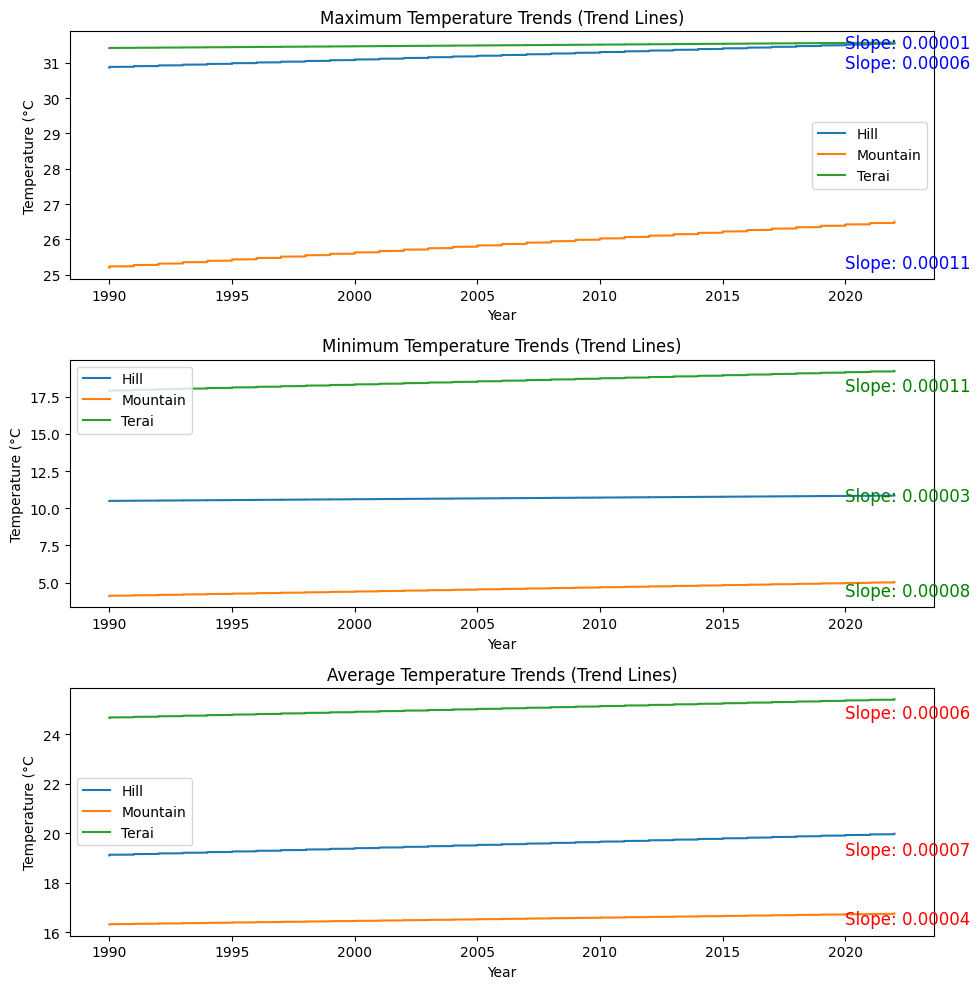

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create subplots for Max T, Min T, and Avg T
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# List of unique 'Geo_region' values
unique_regions = r_w_d2['Geo_region'].unique()

# Create dictionaries to store trend equations
max_trends = {}
min_trends = {}
avg_trends = {}

# Loop through each region and plot the trend line
for i, region in enumerate(unique_regions):
    region_data = r_w_d2[r_w_d2['Geo_region'] == region]
    
    # Extract the year from the index (assuming it's a datetime index)
    years = region_data.index.year
    
    # Calculate the trend line using linear regression
    max_trend = linregress(range(len(region_data['Max T'])), region_data['Max T'])
    min_trend = linregress(range(len(region_data['Min T'])), region_data['Min T'])
    avg_trend = linregress(range(len(region_data['Avg T'])), region_data['Avg T'])
    
    # Plot only the trend lines
    axes[0].plot(years, max_trend.intercept + max_trend.slope * np.arange(len(region_data['Max T'])), label=region)
    axes[1].plot(years, min_trend.intercept + min_trend.slope * np.arange(len(region_data['Min T'])), label=region)
    axes[2].plot(years, avg_trend.intercept + avg_trend.slope * np.arange(len(region_data['Avg T'])), label=region)

    # Store the trend equations
    max_trends[region] = max_trend
    min_trends[region] = min_trend
    avg_trends[region] = avg_trend

# Set titles and labels
axes[0].set_title('Maximum Temperature Trends (Trend Lines)')
axes[1].set_title('Minimum Temperature Trends (Trend Lines)')
axes[2].set_title('Average Temperature Trends (Trend Lines)')

# Add legends and adjust layout
for ax in axes:
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (°C')

# Annotate the slope values on the image
for i, region in enumerate(unique_regions):
    max_slope = max_trends[region].slope
    min_slope = min_trends[region].slope
    avg_slope = avg_trends[region].slope
    axes[0].annotate(f'Slope: {max_slope:.5f}', xy=(2020, max_slope * 30 + max_trends[region].intercept), fontsize=12, color='blue')
    axes[1].annotate(f'Slope: {min_slope:.5f}', xy=(2020, min_slope * 10 + min_trends[region].intercept), fontsize=12, color='green')
    axes[2].annotate(f'Slope: {avg_slope:.5f}', xy=(2020, avg_slope * 20 + avg_trends[region].intercept), fontsize=12, color='red')

plt.tight_layout()
plt.show()


In [ ]:
r_w_d.to_csv('G:/fresh_start/main_thesis/data/work_data/daily_regionwise_all_data.csv')